### Importação das bibliotecas

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from collections import Counter
from wordcloud import WordCloud

### Importação da Base

In [2]:
# Carregue o arquivo CSV usando pandas
df_historico = pd.read_csv(r"C:\Users\Cinara\Downloads\history.csv")
df_historico

,order,id,date,time,title,url,visitCount,typedCount,transition
0,0,37191,5/7/2024,20:13:59,Google Cloud Innovators,https://cloud.google.com/innovators?hl=pt-br,6,0,link
1,1,37302,5/7/2024,20:13:39,Google Developer Profile | Google for Develo...,https://developers.google.com/profile/u/116770...,1,0,link
2,2,37301,5/7/2024,20:13:39,Google Developer Profile | Google for Develo...,https://developers.google.com/profile/u/116770...,2,0,link
3,3,37301,5/7/2024,20:13:09,Google Developer Profile | Google for Develo...,https://developers.google.com/profile/u/116770...,2,0,link
4,4,37300,5/7/2024,20:13:05,Google Developer Profile | Google for Develo...,https://developers.google.com/profile/u/me/my-...,1,0,link
...,...,...,...,...,...,...,...,...,...
3214,3214,34675,4/30/2024,22:32:21,Conecte seu dispositivo • Max,https://auth.max.com/link-connect?flow=connect...,2,0,reload
3215,3215,35772,4/30/2024,22:32:20,AO VIVO: Operário-PR x Grêmio na Jornada Digit...,https://gauchazh.clicrbs.com.br/esportes/gremi...,1,0,link
3216,3216,35773,4/30/2024,22:21:31,"Após pedido de ajuda de Leite, Lula liga para ...",https://g1-globo-com.cdn.ampproject.org/v/s/g1...,1,0,link
3217,3217,35774,4/30/2024,22:21:31,"Após pedido de ajuda de Leite, Lula liga para ...",https://g1-globo-com.cdn.ampproject.org/v/s/g1...,1,0,link


### Análises do Histórico de navegação

In [42]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order            3219 non-null   int64         
 1   id               3219 non-null   int64         
 2   date             3219 non-null   object        
 3   time             3219 non-null   object        
 4   title            3204 non-null   object        
 5   url              3219 non-null   object        
 6   visitCount       3219 non-null   int64         
 7   typedCount       3219 non-null   int64         
 8   transition       3219 non-null   object        
 9   categoria        3219 non-null   object        
 10  datetime         3219 non-null   datetime64[ns]
 11  hora             3219 non-null   int32         
 12  dia_da_semana    3219 non-null   int32         
 13  proxima_visita   3218 non-null   datetime64[ns]
 14  tempo_gasto      3218 non-null   float64

In [45]:
total_registros = len(df_historico)
print("Total de registros no DataFrame:", total_registros)

Total de registros no DataFrame: 3219


#### Sites mais acessados 

In [47]:
# Agrupar os dados pela coluna 'url' e somar as contagens de visitas
sites_acessados = df_historico.groupby('title')['visitCount'].sum()

# Classificar os sites acessados em ordem decrescente de contagem de visitas
sites_acessados = sites_acessados.sort_values(ascending=False)

# Imprimir os sites mais acessados
print("Os sites mais acessados:")
print(sites_acessados.head())

Os sites mais acessados:
title
Caixa de entrada (196) - cinara.neis@gmail.com - Gmail    11355
Caixa de entrada (110) - cinara.neis@gmail.com - Gmail     8636
Label Studio                                               6655
teomewhy - Twitch                                          2171
(2) Feed | LinkedIn                                        1041
Name: visitCount, dtype: int64


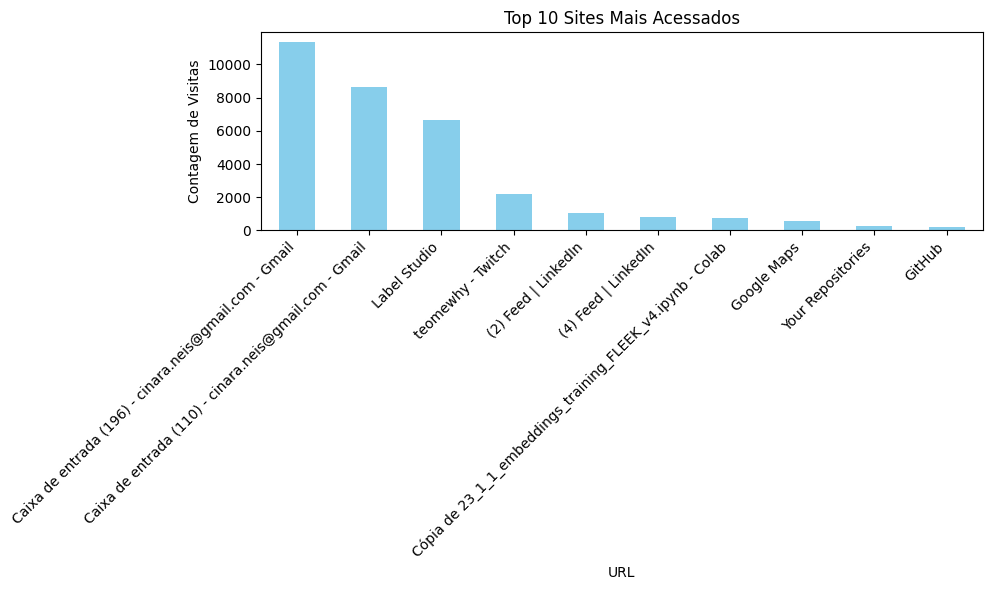

In [48]:
# Pegar os top 10 sites mais acessados
top_sites = sites_acessados.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_sites.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sites Mais Acessados')
plt.xlabel('URL')
plt.ylabel('Contagem de Visitas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

#### Categorias mais acessadas

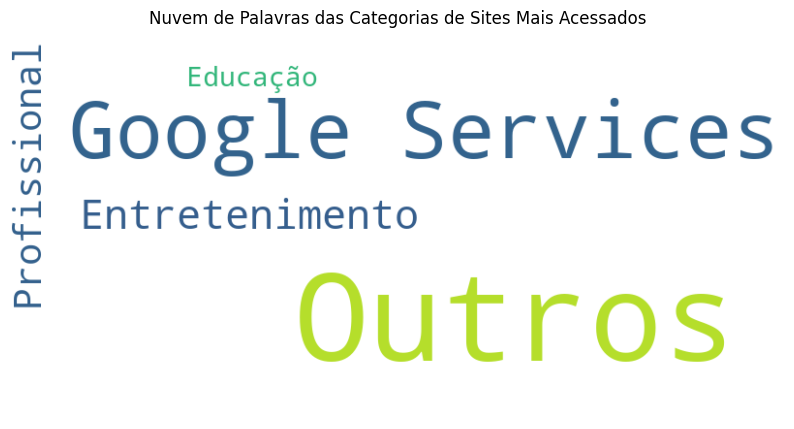

In [58]:
urls = df_historico['categoria']
contagem_urls = Counter(urls)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contagem_urls)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras das Categorias de Sites Mais Acessados')
plt.axis('off')

# Mostrar a nuvem de palavras
plt.show()

#### Visitas por dia da semana

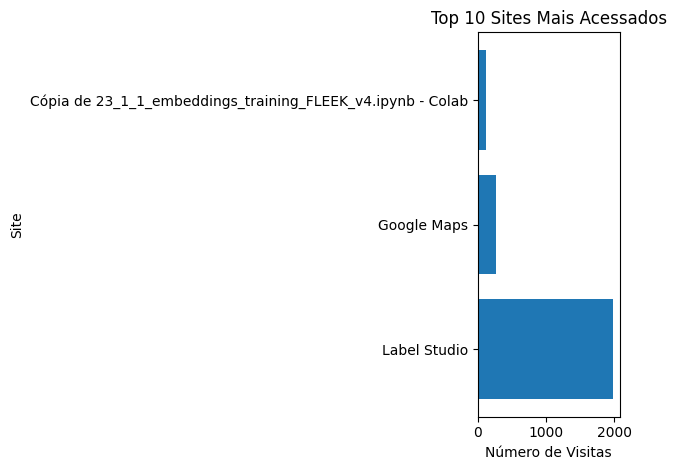

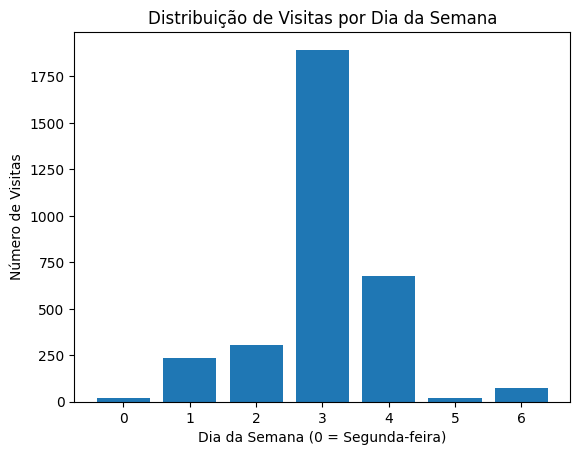

In [16]:
# Contagem de visitas por site
site_counts = df_historico["title"].value_counts()

# Filtre os 5 sites mais acessados
top_3_sites = site_counts.head(3)

# Crie um gráfico de barras horizontais
plt.barh(top_3_sites.index, top_3_sites.values)
plt.ylabel("Site")
plt.xlabel("Número de Visitas")
plt.title("Top 10 Sites Mais Acessados")
plt.tight_layout()
plt.show()

# Contagem de visitas por dia da semana
df_historico["dia_da_semana"] = df_historico["datetime"].dt.weekday
weekday_counts = df_historico["dia_da_semana"].value_counts()

# Crie um gráfico de barras para visitas por dia da semana
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel("Dia da Semana (0 = Segunda-feira)")
plt.ylabel("Número de Visitas")
plt.title("Distribuição de Visitas por Dia da Semana")
plt.show()

#### Distribuição de visitas por hora do dia

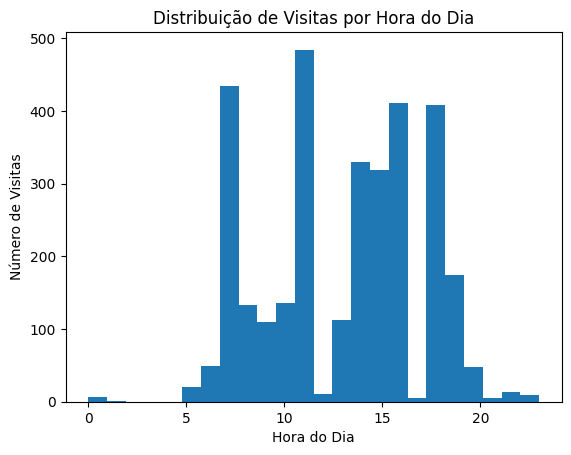

In [18]:
df_historico["hora"] = df_historico["datetime"].dt.hour

# Crie um histograma para visitas por hora do dia
plt.hist(df_historico["hora"], bins=24)
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Visitas")
plt.title("Distribuição de Visitas por Hora do Dia")
plt.show()

#### Tempo gasto em cada site (Estimativa)

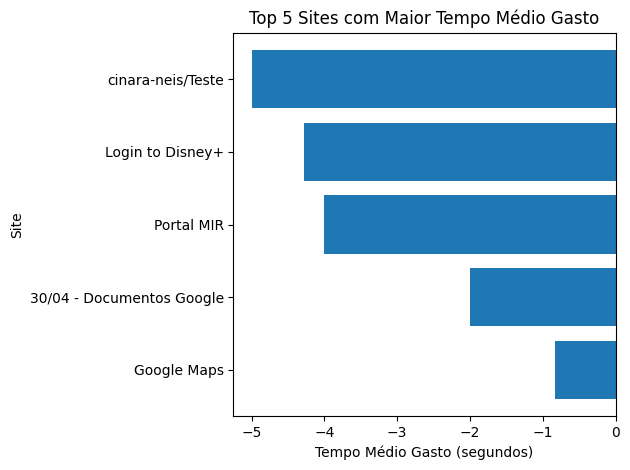

In [38]:

# Converta as colunas de data e hora para datetime
df_historico["datetime"] = pd.to_datetime(df_historico["date"] + " " + df_historico["time"])

# Crie uma coluna com o tempo da próxima visita
df_historico["proxima_visita"] = df_historico["datetime"].shift(-1)

# Calcule o tempo gasto em cada visita (em segundos)
df_historico["tempo_gasto"] = (df_historico["proxima_visita"] - df_historico["datetime"]).dt.total_seconds()

# Remova a última linha (NaN)
df = df_historico[:-1]

# Conte o número de visitas por site
visitas_por_site = df["url"].value_counts()

# Filtre os sites com mais de 5 visitas (ajuste o valor conforme necessário)
sites_com_mais_dados = visitas_por_site[visitas_por_site > 5].index

# Filtre o DataFrame pelos sites com mais dados
df_filtrado = df[df["url"].isin(sites_com_mais_dados)]

# Calcule o tempo médio gasto por site
tempo_medio_por_site = df_filtrado.groupby("title")["tempo_gasto"].mean()

# Filtre os 5 sites com maior tempo médio gasto
top_5_tempo_medio = tempo_medio_por_site.nlargest(5)

# Crie um gráfico de barras horizontais
plt.barh(top_5_tempo_medio.index, top_5_tempo_medio.values)
plt.ylabel("Site")
plt.xlabel("Tempo Médio Gasto (segundos)")
plt.title("Top 5 Sites com Maior Tempo Médio Gasto")
plt.tight_layout()
plt.show()

#### Padrões de navegação sequencial

In [41]:
# Crie uma lista de sequências de 2 sites
sequencias = list(zip(df_historico["title"].shift(-1)))

# Conte a frequência de cada sequência
from collections import Counter
sequencia_counts = Counter(sequencias)

# Imprima as sequências mais frequentes
print(sequencia_counts.most_common(5))

[(('Label Studio',), 1982), (('Google Maps',), 270), (('Cópia de 23_1_1_embeddings_training_FLEEK_v4.ipynb - Colab',), 128), (('Fazer login nas Contas do Google',), 21), (('eCAC - Centro Virtual de Atendimento',), 18)]


### Conclusão

In [39]:
conclusoes = [
    "**Foco principal:**",
    "* Desenvolvimento profissional e aprendizado (LinkedIn, Label Studio, DataCamp)",
    "* Ciência de dados e Machine Learning (Label Studio, DataCamp)",
    "",
    "**Outras atividades:**",
    "* Acompanhamento de notícias (sites sobre enchentes no RS)",
    "* Produtividade e organização (Gmail, Google Drive)",
    "* Entretenimento (Twitch, Disney+)",
    "",
    # ... demais conclusões ...
]

df_historico["categoria_geral"] = df_historico["categoria"].apply(lambda x: "Trabalho/Estudo" if x in ["Profissional", "Machine Learning", "Educação"] else "Lazer")
categoria_geral_counts = df_historico["categoria_geral"].value_counts()

# Adicionar conclusão sobre o equilíbrio
conclusoes.append(f"Proporção de visitas Trabalho/Estudo vs. Lazer: {categoria_geral_counts['Trabalho/Estudo'] / categoria_geral_counts['Lazer']:.2f}")

# Formatar o texto para melhor legibilidade
texto_formatado = "\n".join(textwrap.fill(linha, width=80) for linha in conclusoes)

# Imprimir as conclusões formatadas
print(texto_formatado)

**Foco principal:**
* Desenvolvimento profissional e aprendizado (LinkedIn, Label Studio, DataCamp)
* Ciência de dados e Machine Learning (Label Studio, DataCamp)

**Outras atividades:**
* Acompanhamento de notícias (sites sobre enchentes no RS)
* Produtividade e organização (Gmail, Google Drive)
* Entretenimento (Twitch, Disney+)

Proporção de visitas Trabalho/Estudo vs. Lazer: 0.01
